<a href="https://colab.research.google.com/github/Sebas9626/daggendask/blob/main/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying Data Science and Machine Learning Models in the Stock Market


This notebook will perform an analysis of the stock market in technology companies. The correlations of how various market factors vary will be analyzed in order to create a probabilistic prediction model using machine learning.

### Required APIs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import binom
import requests
!pip install yfinance
import yfinance as yf
!pip install fmpsdk
import fmpsdk
!pip install pyfolio
import pyfolio as pf

today = datetime.now()
year_ago = today - timedelta(360)
companies = ['AMZN', 'AAPL', 'MSFT', 'GOOGL', 'GOOG', 'META', 'TSLA', 'NVDA', 'ADBE', 'IBM']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 16.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.6 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88681 sha256=ee2bd1d4a95fcf0e9d531f66865d6e5863c177da785a9ce6b16aba4d0e3e536a
  Stored in directory: /root/.cache/pip/wheels/42/16/92/9c9d49efccc497040268960f0825101cc9b1c6e41cdc5a409e
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39778 sha256=f3c4531ed79fb235ccce43978414949a76dc48833f9ece2989d5eb479292747f
  Stored in directory: /root/.cache/pip/wheels/0d/68/bb/926065fb74

/usr/local/lib/python3.8/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


The chosen companies for the analysis were the next:

1.   Amazon (AMZN)
2.   Apple (AAPL)
3.   Microsoft (MSFT)
4.   Google (GOOGL)
5.   Google, Alphabet (GOOGL)
6.   Facebook (META)
7.   Tesla (TSLA)
8.   NVidia (NVDA)
9.   Adobe (ADBE)
10.  IBM (IBM)

Since the analysis will be performed over technological companies, we expect to find some correlations not only on the data that is specific for a company but in all the data and fluctuations in the entire group to find trendings on the market and valuable information.

Coming on the next coding part, the data will be downloaded from Yahoo Finance where we can find information about the behaviour of the price around the day and the Volume, that means how many transactions were performed along the day, the information for the last 6 months for the companies will be downloaded for further analysis.

With these values, 'Close Adjusted Price' and 'Volume', is possible to calculate the simple return (SR) and the market Volume change (MVC)which are just the variation in percentage of the above.


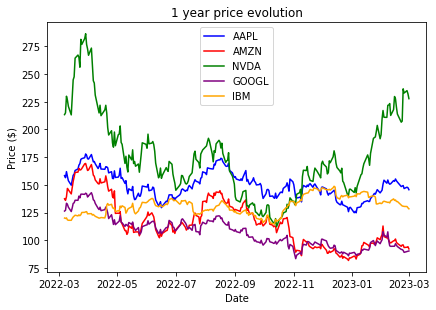

In [2]:
company_dfs = {}
pd.options.display.float_format = '{:,.5f}'.format


for company in companies:
  
  df = yf.download(company,
              start= year_ago,
              end= today,
              progress=False)

  df = df.loc[:, ['Adj Close']]
  df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
  df['SR_nr'] = df['adj_close'].pct_change()
  df['SR'] = round(df.adj_close.pct_change(), 2)
  
  company_dfs[company] = df
  
AAPL = company_dfs['AAPL']
AMZN = company_dfs['AMZN']
MSFT = company_dfs['MSFT']
GOOGL = company_dfs['GOOGL']
GOOG = company_dfs['GOOG']
META = company_dfs['META']
TSLA = company_dfs['TSLA']
NVDA = company_dfs['NVDA']
ADBE = company_dfs['ADBE']
IBM = company_dfs['IBM']

plt.plot(AAPL.index, AAPL['adj_close'], color='blue', label='AAPL')
plt.plot(AMZN.index, AMZN['adj_close'], color='red', label='AMZN')
plt.plot(NVDA.index, NVDA['adj_close'], color='green', label='NVDA')
plt.plot(GOOGL.index, GOOGL['adj_close'], color='purple', label='GOOGL')
plt.plot(IBM.index, IBM['adj_close'], color='orange', label='IBM')
plt.legend()
plt.tight_layout()
plt.title('1 year price evolution')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.rcParams["figure.figsize"] = (15,5) # Ancho: 20 pulgadas, altura: 5 pulgadas
plt.show()

In [3]:
AAPL

,adj_close,SR_nr,SR
Date,,,
2022-03-07,158.34082,NaN,NaN
2022-03-08,156.49202,-0.01168,-0.01000
2022-03-09,161.96884,0.03500,0.03000
2022-03-10,157.56552,-0.02719,-0.03000
2022-03-11,153.79832,-0.02391,-0.02000
...,...,...,...
2023-02-23,149.39999,0.00329,0.00000
2023-02-24,146.71001,-0.01801,-0.02000
2023-02-27,147.92000,0.00825,0.01000


In [4]:
# Simple Return mean: last 10 days
gainers = {}
pd.options.display.float_format = '{:,.5f}'.format

for i,df in enumerate(companies):
  df = company_dfs[companies[i]]
  df = df.tail(10)
  df = df.loc[:, ['SR_nr']]
  gainers.update({
      companies[i]: df.mean()})
gainers_df= pd.DataFrame.from_dict(gainers, orient='index')
gainers_df['SR_nr'].sort_values(ascending=False)

NVDA     0.00026
TSLA    -0.00238
META    -0.00287
GOOGL   -0.00453
GOOG    -0.00466
AAPL    -0.00497
IBM     -0.00570
AMZN    -0.00763
MSFT    -0.00943
ADBE    -0.01494
Name: SR_nr, dtype: float64

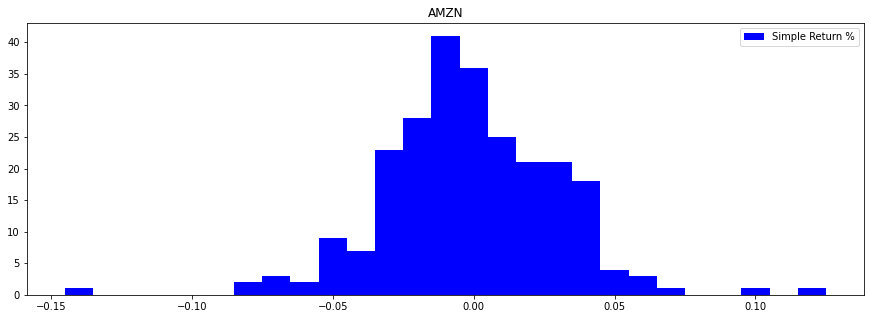

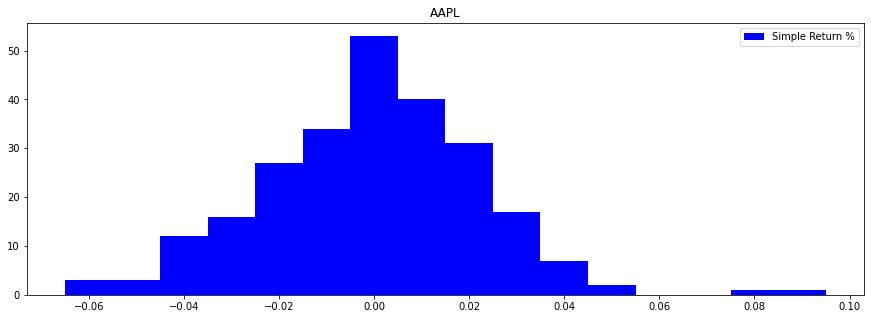

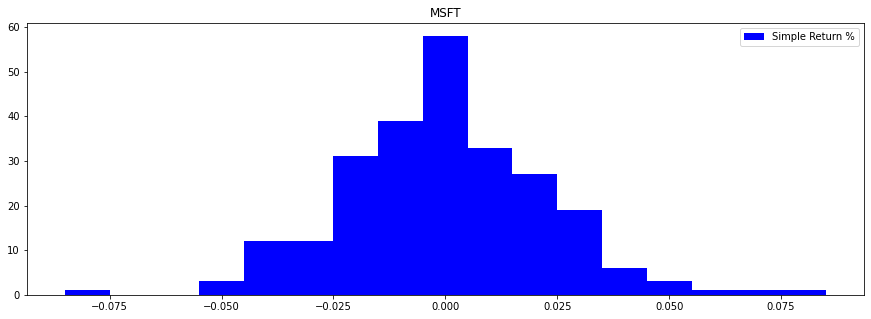

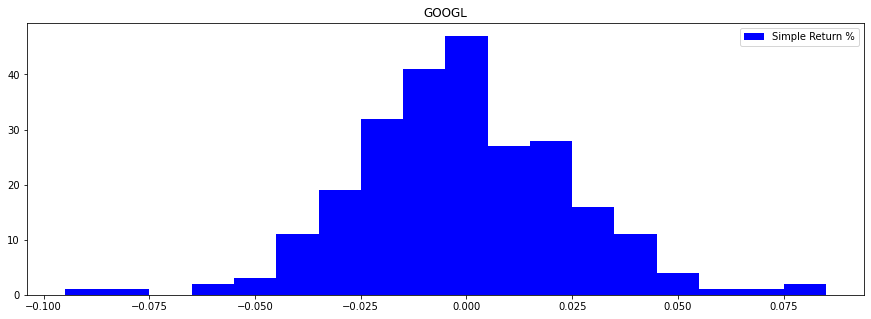

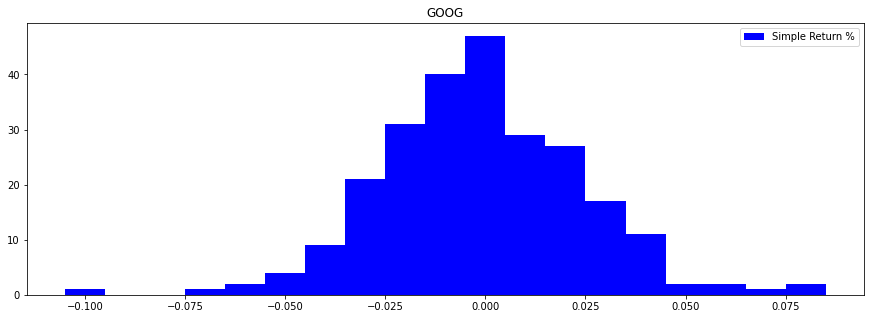

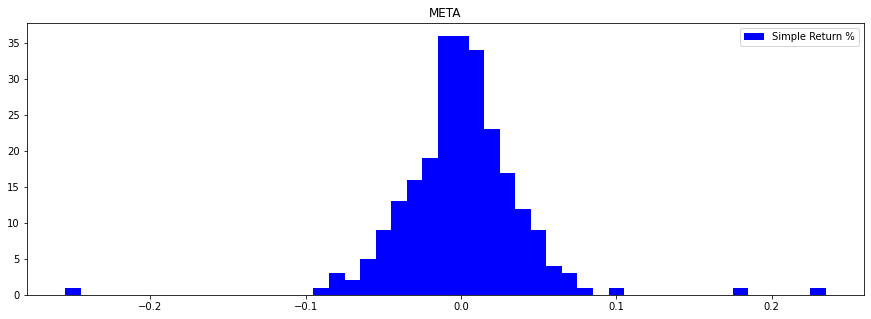

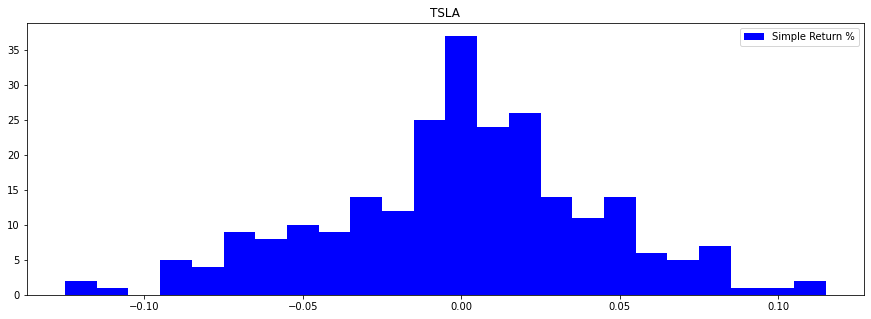

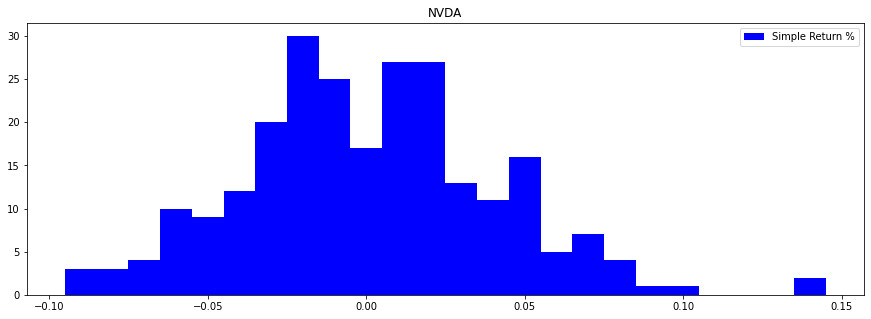

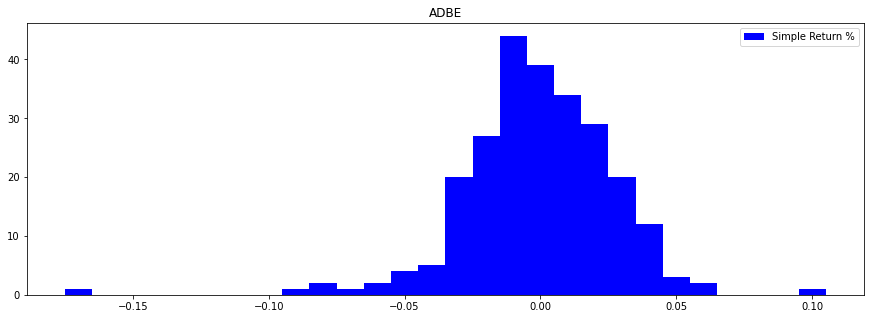

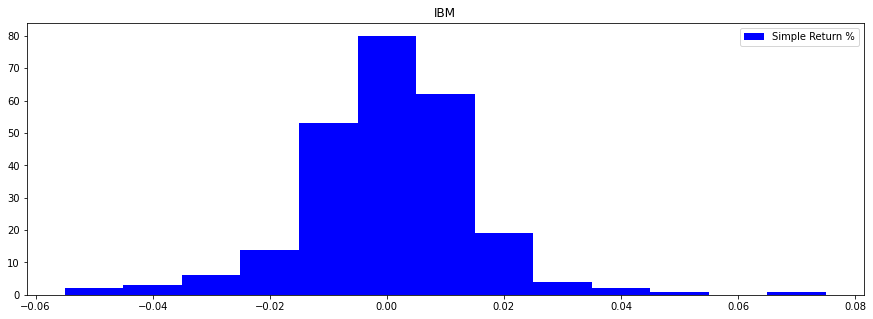

In [5]:
for company in companies:
  sr, cr = np.unique(company_dfs[company]['SR'], return_counts=True)
  plt.bar(sr, cr, width=0.01, color='blue', label='Simple Return %')
  plt.legend()
  plt.title(company)
  plt.show()


In [ ]:
SR = {}
for company in companies:
  SR[company] = company_dfs[company]['SR_nr']

SR_df = pd.DataFrame.from_dict(SR, orient='index')
SR_df = SR_df.T.dropna().reset_index(drop=True)
SR_df

In [7]:
SR_df.corr()

,AMZN,AAPL,MSFT,GOOGL,GOOG,META,TSLA,NVDA,ADBE,IBM
AMZN,1.00000,0.69461,0.75291,0.75220,0.75258,0.61407,0.55255,0.68472,0.65951,0.35466
AAPL,0.69461,1.00000,0.80645,0.78228,0.77342,0.60773,0.62926,0.72971,0.69685,0.50033
MSFT,0.75291,0.80645,1.00000,0.82669,0.82305,0.61647,0.52567,0.75260,0.75355,0.45610
GOOGL,0.75220,0.78228,0.82669,1.00000,0.99790,0.70561,0.52151,0.70483,0.70938,0.38739
GOOG,0.75258,0.77342,0.82305,0.99790,1.00000,0.70447,0.51640,0.70260,0.70657,0.37971
META,0.61407,0.60773,0.61647,0.70561,0.70447,1.00000,0.38624,0.57216,0.57376,0.20508
TSLA,0.55255,0.62926,0.52567,0.52151,0.51640,0.38624,1.00000,0.65690,0.48832,0.14510
NVDA,0.68472,0.72971,0.75260,0.70483,0.70260,0.57216,0.65690,1.00000,0.68980,0.34707
ADBE,0.65951,0.69685,0.75355,0.70938,0.70657,0.57376,0.48832,0.68980,1.00000,0.37767
IBM,0.35466,0.50033,0.45610,0.38739,0.37971,0.20508,0.14510,0.34707,0.37767,1.00000


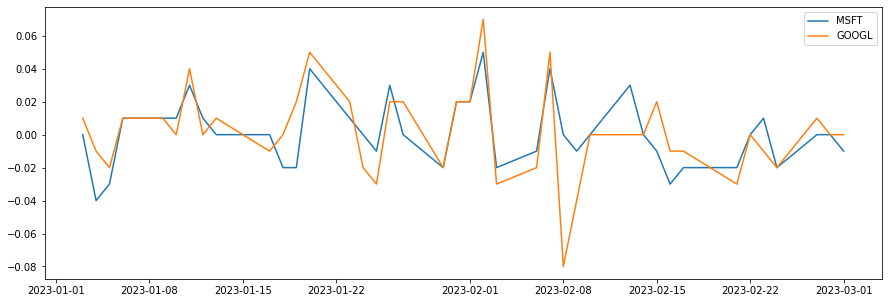

In [8]:
MSFT_20 = MSFT.tail(40)
GOOGL_20 = GOOGL.tail(40)

plt.plot(MSFT_20.index, MSFT_20['SR'], label='MSFT')
plt.plot(GOOGL_20.index, GOOGL_20['SR'], label='GOOGL')
plt.legend()
plt.show()

In [9]:
pd.options.display.float_format = '{:,.4f}'.format

# FinancialModelingPrep API Key to download data, there is only 250 daily requests per APIkey so, be smart
# (60 requests per 'Ctrl+Enter')
api ='24403e7280a422c43617dea0aa845275'
#api ='025d7a8b88937128d343410481e169cf'
#api ='fcff3764d2f9decb3ac3cb8d9f9e9ede'

financials ={}

# IS for Income Statement, BS for Balance Sheet, CF for Cash Flow

for item in companies:
        
        IS = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{item}?limit=120&apikey={api}').json()
        BS = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{item}?limit=120&apikey={api}').json()
        CF = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{item}?limit=120&apikey={api}').json()
        Ratios = requests.get(f'https://financialmodelingprep.com/api/v3/ratios/{item}?limit=120&apikey={api}').json()
        key_Metrics = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{item}?limit=120&apikey={api}').json()
        profile = requests.get(f'https://financialmodelingprep.com/api/v3/profile/{item}?limit=120&apikey={api}').json()
        millions = 1000000

        years = [2022, 2021, 2020, 2019, 2018]
        
        financials[item]= {}
        for i,year in enumerate(years):
          financials[item][year] ={}

          # INDICADORES CLAVE

          financials[item][year]['Mkt Cap'] = key_Metrics[i]['marketCap'] / millions  
          financials[item][year]['Debt to Equity'] = key_Metrics[i]['debtToEquity']  
          financials[item][year]['Debt to Assets'] = key_Metrics[i]['debtToAssets']  
          financials[item][year]['Revenue per Share'] = key_Metrics[i]['revenuePerShare']  
          financials[item][year]['NI per Share'] = key_Metrics[i]['netIncomePerShare']  
          financials[item][year]['Revenue'] = IS[i]['revenue'] / millions  
          financials[item][year]['Gross Profit'] = IS[i]['grossProfit'] /millions  
          financials[item][year]['R&D Expenses'] = IS[i]['researchAndDevelopmentExpenses'] / millions  
          financials[item][year]['Op Expenses'] = IS[i]['operatingExpenses'] / millions  
          financials[item][year]['Op Income'] = IS[i]['operatingIncome'] / millions  
          financials[item][year]['Net Income'] = IS[i]['netIncome'] / millions  
          financials[item][year]['Cash'] = BS[i]['cashAndCashEquivalents'] / millions  
          financials[item][year]['Inventory'] = BS[i]['inventory'] / millions  
          financials[item][year]['Cur Assets'] = BS[i]['totalCurrentAssets'] / millions  
          financials[item][year]['LT Assets'] = BS[i]['totalNonCurrentAssets'] / millions  
          financials[item][year]['Int Assets'] = BS[i]['intangibleAssets'] / millions  
          financials[item][year]['Total Assets'] = BS[i]['totalAssets'] / millions  
          financials[item][year]['Cur Liab'] = BS[i]['totalCurrentLiabilities'] / millions  
          financials[item][year]['LT Debt'] = BS[i]['longTermDebt'] / millions  
          financials[item][year]['LT Liab'] = BS[i]['totalNonCurrentLiabilities'] / millions  
          financials[item][year]['Total Liab'] = BS[i]['totalLiabilities'] / millions  
          financials[item][year]['SH Equity'] = BS[i]['totalStockholdersEquity'] / millions  
          financials[item][year]['OA Cash'] = CF[i]['netCashProvidedByOperatingActivities'] / millions  
          # financials[item][year]['IA Cash'] = CF[i]['netCashUsedForInvestingActivities'] / millions  
          financials[item][year]['FA Cash'] = CF[i]['netCashUsedProvidedByFinancingActivities'] / millions  
          financials[item][year]['CAPEX'] = CF[i]['capitalExpenditure'] / millions  
          financials[item][year]['FCF'] = CF[i]['freeCashFlow'] / millions  
          financials[item][year]['Dividends Paid'] = CF[i]['dividendsPaid'] / millions  
          
          # INDICADORES DEL ESTADO DE RESULTADOS  

          financials[item][year]['Gross Profit Margin'] = Ratios[i]['grossProfitMargin']  
          financials[item][year]['Op Margin'] = Ratios[i]['operatingProfitMargin']  
          financials[item][year]['Int Coverage'] = Ratios[i]['interestCoverage']  
          financials[item][year]['Net Profit Margin'] = Ratios[i]['netProfitMargin']  
          financials[item][year]['Dividend Yield'] = Ratios[i]['dividendYield']  

          # INDICADORES DEL ESTADO DE SITUACION FINANCIERA  

          financials[item][year]['Current Ratio'] = Ratios[i]['currentRatio']  
          financials[item][year]['Operating Cycle'] = Ratios[i]['operatingCycle']  
          financials[item][year]['Days of AP Outstanding'] = Ratios[i]['daysOfPayablesOutstanding']  
          financials[item][year]['Cash Conversion Cycle'] = Ratios[i]['cashConversionCycle']  

          # INDICADORES DE RENTABILIDAD  

          financials[item][year]['ROA'] = Ratios[i]['returnOnAssets']  
          financials[item][year]['ROE'] = Ratios[i]['returnOnEquity']  
          financials[item][year]['ROCE'] = Ratios[i]['returnOnCapitalEmployed']  

          # INDICADORES DE PRECIO  

          financials[item][year]['PE'] = Ratios[i]['priceEarningsRatio']  
          financials[item][year]['PS'] = Ratios[i]['priceToSalesRatio']  
          financials[item][year]['PB'] = Ratios[i]['priceToBookRatio']  
          financials[item][year]['Price to FCF'] = Ratios[i]['priceToFreeCashFlowsRatio']  
          financials[item][year]['PEG'] = Ratios[i]['priceEarningsToGrowthRatio']  
          financials[item][year]['EPS'] = IS[i]['eps'] 
          
          
print(financials)

{'AMZN': {2022: {'Mkt Cap': 855876.0, 'Debt to Equity': 2.1680737864875415, 'Debt to Assets': 0.6843507861890096, 'Revenue per Share': 50.44489154971047, 'NI per Share': -0.2671508489547551, 'Revenue': 513983.0, 'Gross Profit': 67640.0, 'R&D Expenses': 0.0, 'Op Expenses': 55392.0, 'Op Income': 12248.0, 'Net Income': -2722.0, 'Cash': 53888.0, 'Inventory': 34405.0, 'Cur Assets': 146791.0, 'LT Assets': 315884.0, 'Int Assets': 0.0, 'Total Assets': 462675.0, 'Cur Liab': 155393.0, 'LT Debt': 140118.0, 'LT Liab': 161239.0, 'Total Liab': 316632.0, 'SH Equity': 146043.0, 'OA Cash': 46752.0, 'FA Cash': 9718.0, 'CAPEX': -63645.0, 'FCF': -16893.0, 'Dividends Paid': 0.0, 'Gross Profit Margin': 0.13159968325800658, 'Op Margin': 0.023829581912242232, 'Int Coverage': 5.174482467258133, 'Net Profit Margin': -0.005295895000418302, 'Dividend Yield': 0, 'Current Ratio': 0.9446435811136924, 'Operating Cycle': 58.21646056345604, 'Days of AP Outstanding': 65.09343711002525, 'Cash Conversion Cycle': -6.876976

In [10]:
AMZN_fin = pd.DataFrame.from_dict(financials['AMZN'], orient='index')
AAPL_fin = pd.DataFrame.from_dict(financials['AAPL'], orient='index')
MSFT_fin = pd.DataFrame.from_dict(financials['MSFT'], orient='index')
GOOGL_fin = pd.DataFrame.from_dict(financials['GOOGL'], orient='index')
GOOG_fin = pd.DataFrame.from_dict(financials['GOOG'], orient='index')
META_fin = pd.DataFrame.from_dict(financials['META'], orient='index')
TSLA_fin = pd.DataFrame.from_dict(financials['TSLA'], orient='index')
NVDA_fin = pd.DataFrame.from_dict(financials['NVDA'], orient='index')
ADBE_fin = pd.DataFrame.from_dict(financials['ADBE'], orient='index')
IBM_fin = pd.DataFrame.from_dict(financials['IBM'], orient='index')
AMZN_fin

,Mkt Cap,Debt to Equity,Debt to Assets,Revenue per Share,NI per Share,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,...,Cash Conversion Cycle,ROA,ROE,ROCE,PE,PS,PB,Price to FCF,PEG,EPS
2022,"855,876.0000",2.1681,0.6844,50.4449,-0.2672,"513,983.0000","67,640.0000",0.0000,"55,392.0000","12,248.0000",...,-6.8770,-0.0059,-0.0186,0.0399,-314.4291,1.6652,5.8604,-50.6645,2.4702,-0.9000
2021,"1,687,176.0400",2.0421,0.6713,46.4251,3.2968,"469,822.0000","66,315.0000","56,052.0000","41,436.0000","24,879.0000",...,-16.0792,0.0793,0.2413,0.0894,50.5688,3.5911,12.2042,-114.5712,0.8764,3.2980
2020,"1,628,465.0000",2.4388,0.7092,38.6064,2.1331,"386,064.0000","94,240.0000","42,740.0000","71,341.0000","22,899.0000",...,-37.7638,0.0664,0.2284,0.1175,76.3426,4.2181,17.4346,62.8169,0.9320,2.0913
2019,"912,832.9600",2.6295,0.7245,28.3929,1.1729,"280,522.0000","74,754.0000","35,931.0000","60,213.0000","14,541.0000",...,-20.2521,0.0514,0.1867,0.1058,78.7740,3.2541,14.7089,42.1573,5.5761,1.1496
2018,"731,459.3900",2.7348,0.7323,23.9104,1.0342,"232,887.0000","59,704.0000","28,837.0000","47,283.0000","12,421.0000",...,-18.1599,0.0619,0.2313,0.1318,72.6158,3.1408,16.7962,42.2907,0.3319,1.0073


In [11]:
fin_dfs = [AMZN_fin, AAPL_fin, MSFT_fin, GOOGL_fin, GOOG_fin, META_fin, TSLA_fin, NVDA_fin, ADBE_fin, IBM_fin]

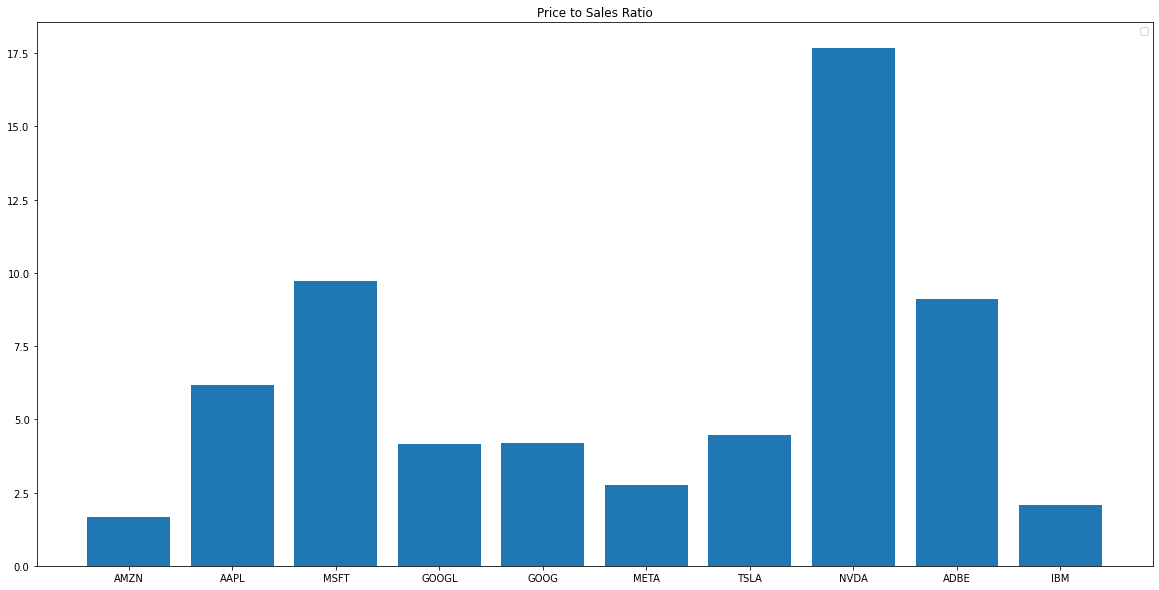

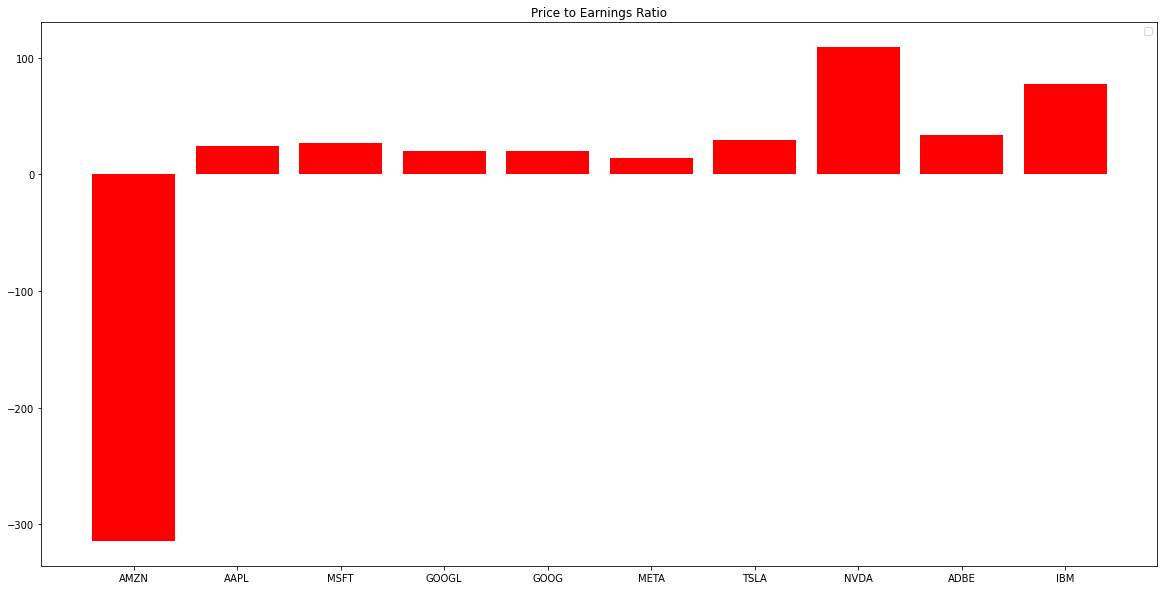

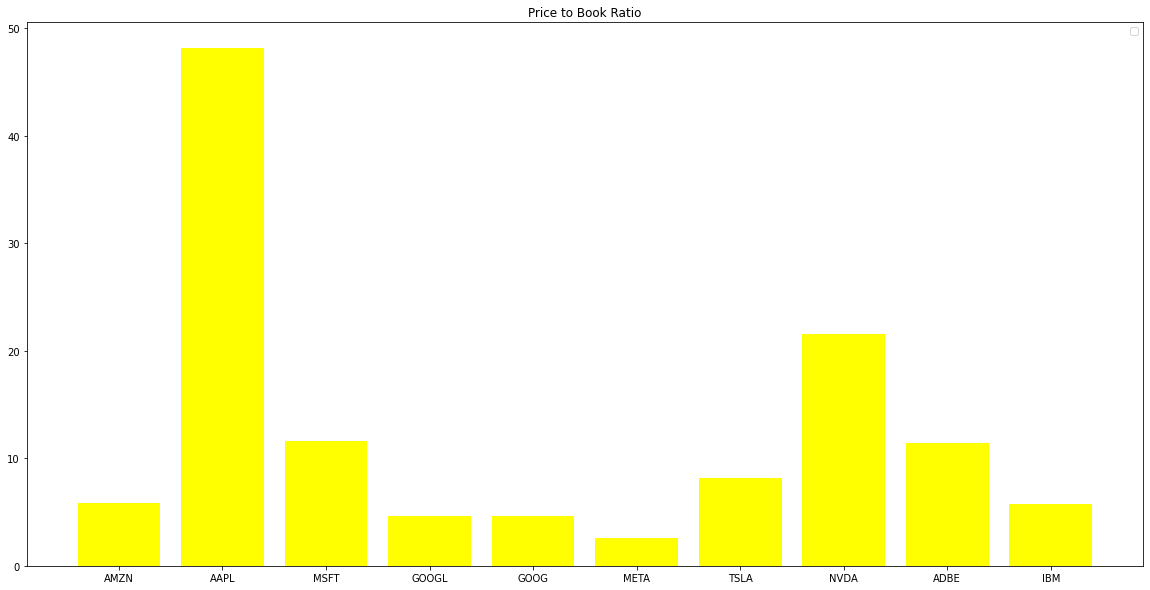

,AMZN,AAPL,MSFT,GOOGL,GOOG,META,TSLA,NVDA,ADBE,IBM
P/S Ratio,1.6652,6.1861,9.7100,4.1654,4.1890,2.7730,4.4728,17.6673,9.1173,2.0855
P/E Ratio,-314.4291,24.4418,26.4676,19.6447,19.7561,13.9377,28.9570,109.1023,33.7509,77.0202
P/B Ratio,5.8604,48.1403,11.5598,4.5995,4.6256,2.5722,8.1506,21.5628,11.4240,5.7526
P/FCF Ratio,-50.6645,21.8889,29.5507,19.6323,19.7436,16.9793,48.2477,125.1468,21.7035,14.7214


In [35]:
PR_df = {}
for i, company in enumerate(companies):
  PR_df[company] = {}
  PR_df[company]['P/S Ratio'] = financials[company][2022]['PS']
  PR_df[company]['P/E Ratio'] = financials[company][2022]['PE']
  PR_df[company]['P/B Ratio'] = financials[company][2022]['PB']
  PR_df[company]['P/FCF Ratio'] = financials[company][2022]['Price to FCF']
PR_df = pd.DataFrame.from_dict(PR_df, orient='columns')

plt.figure(figsize=(20,10))
x1 = PR_df.columns
y1 = PR_df.iloc[0,]
plt.bar(x1, y1)
plt.title('Price to Sales Ratio')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
x1 = PR_df.columns
y1 = PR_df.iloc[1,]
plt.bar(x1, y1, color='red')
plt.title('Price to Earnings Ratio')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
x1 = PR_df.columns
y1 = PR_df.iloc[2,]
plt.bar(x1, y1, color='yellow')
plt.title('Price to Book Ratio')
plt.legend()
plt.show()
PR_df

In [ ]:
priceRatios(2021)

In [18]:
AMZN_fin['PE'][2022]

-314.42909625275536

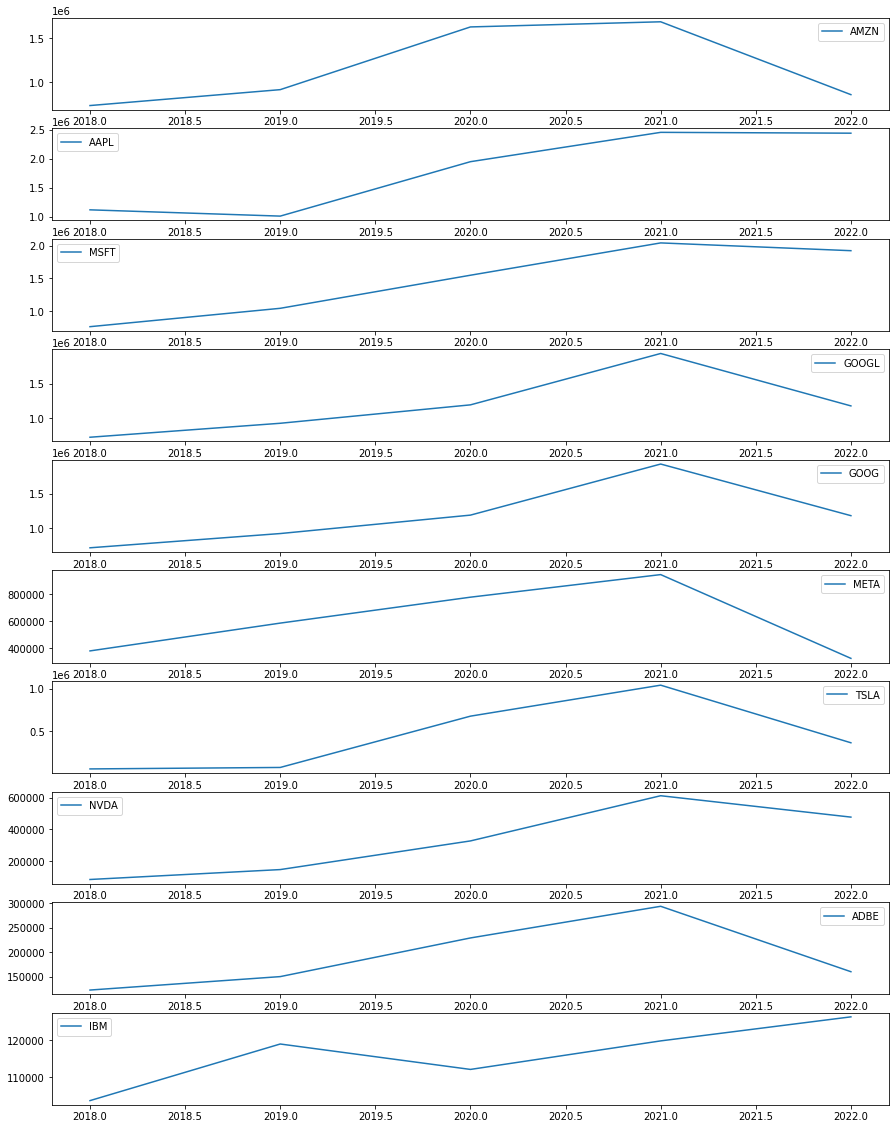

In [16]:
for i,df in enumerate(fin_dfs):
  plt.subplot(len(fin_dfs),1,i+1)
  plt.plot(df.index, df['Mkt Cap'], label=companies[i])
  plt.legend()
  
plt.rcParams["figure.figsize"] = (15,20) 
plt.show()

In [14]:
financials_df = pd.DataFrame.from_dict(financials, orient='columns')

In [ ]:
n_companies = len(companies)

prices_df = yf.download(companies, start=year_ago, end=today)

returns = prices_df['Adj Close'].pct_change().dropna()

portfolio_weights = n_companies * [1 / n_companies]
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), index=returns.index)
pf.create_simple_tear_sheet(portfolio_returns)